# **SVM_Classification for nonLinear boudary** this is used when the dataset are defined such way that not a single straight line could be defined to segregate those datapoints wrt their classes called not linearly separeable.
## Implimneted from **radial-basis-of-kernel {Gaussian RBF Kernel}**
# **Eqaution:** K(x,Li)=e^[-(||x-Li||^2)/2sigma^2], and K is kernel, where x and Li are vectors and Li denotes the landmark of the datapoint, and x is the datapoint, double verticle line means distance between the x and Li and sigma is a fixed paramter
# Landamark is the location just below the tip of the pyramidFugure or GaussianSurface and verticle axis represents the result
## The equation gives the verticle axis length such a way that, when the data point comes nearer to the landmark the verticle length increase of that data point means the equation can be used for making decision boundary based upon that, which can be used for segreating the anotherCLass datapoints by chanigng their dimension, in by altering the sigma we could set from where the changing of dimnesion would start in which the y_axis value would be greater than 0 inside the circumference/decisionBoundary and outside it would be 0, this way dimnesion got change and differentClassed datapoints got separable. Sigma proportional to wider circumferenece/decisionBoundary


## Importing Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing datasets

In [25]:
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

## Getting training and testing datasets

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

## FeatureScaling

In [27]:
#Feature Scaling for X
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

## Training the Kernel SVM model for classification

In [28]:
from sklearn.svm import SVC
classifier= SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,Y_train)

SVC(random_state=0)

## Predicting the new result

In [29]:
print(classifier.predict(sc_x.transform([[30,87000]])))

[0]


## Predicting test datapoints

In [33]:
Y_pred=classifier.predict(X_test)
#Would provide the result in 2d-manner in same matrix in which eneites have thier own column
print(np.column_stack((Y_pred,Y_test)))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


## Confusion Matrix for checking how many wrong and right

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[55,  3],
       [ 1, 21]])

## Accuracy

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.95

## Visualising the training graph

<ipython-input-36-b1b298c6aa0b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


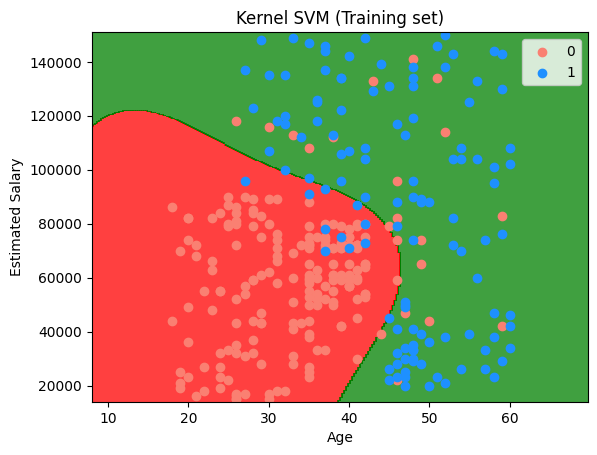

In [36]:
from matplotlib.colors import ListedColormap
X_set,Y_set= sc_x.inverse_transform(X_train),Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),## StepSize decides the smoothness of the curve
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualisiling the testing results

<ipython-input-37-e873099c53b3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


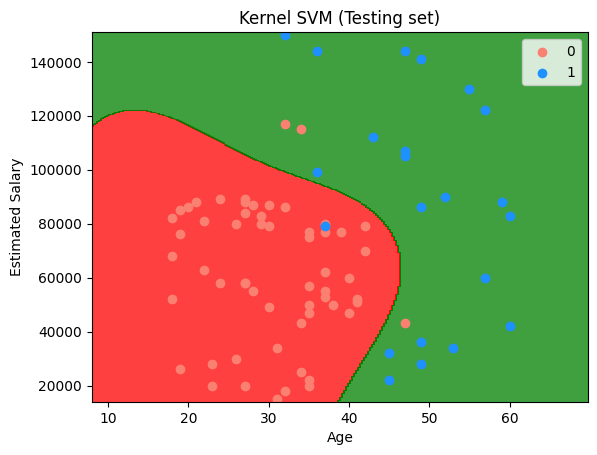

In [37]:
from matplotlib.colors import ListedColormap
X_set,Y_set= sc_x.inverse_transform(X_test),Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()